# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [101]:
!pip install statsmodels

     |████████████████████████████████| 9.6 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 31.3 MB/s eta 0:00:01


In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import statsmodels.formula.api as smf

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data


,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

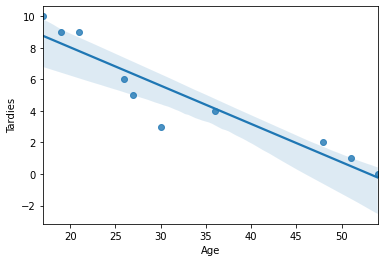

In [12]:
data = student_data
sns.regplot (x = "Age", y = "Tardies", data =data)

> Existe una relacion lineal inversa entre las variables edad y tardanza.

> Presencia de valores atipicos en los pts: (17,10), (27,5),(48,2),(26,6)

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

<AxesSubplot:>

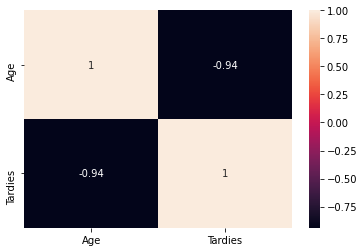

In [16]:
correlation_matrix = student_data.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

> Como india la matriz de correlacin existe una relacion dependencia lineal negativa entre las dos variable.


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [78]:
X = data['Age']
Y = data['Tardies']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
stats.linregress(X, Y)

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607, intercept_stderr=1.1106388506135392)

0.00556665383455343

In [75]:
print ('la pendiente es : ' + str(slope))
print ('la interseccion es : ' + str(intercept))

la pendiente es : -0.2428207709159808
la interseccion es : 12.888803363135768


In [21]:
b0 = intercept
b1 = slope

student_data['model'] = b0 + b1 * student_data['Age']
student_data

,Age,Tardies,model
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


> Se contruye un modelo de regresion lineal simple siendo la variable independiente 'Tardies' y la explicativa 'Age'

Plot your regression model on your scatter plot.

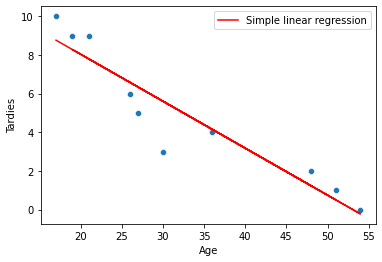

In [72]:
fig, ax = plt.subplots()
sns.scatterplot(x=student_data['Age'],y =  data['Tardies'] )
plt.plot(student_data['Age'], student_data['model'], color='r', label='Simple linear regression')
plt.legend()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

> Nuestro modelo determina negativamente las variables edad y nuemro de veces que una persona llega tarde. Teniendo en cuenta la presencia de atipicos y el reducido tamaño de las muestra seria poco prudente decir que cuanta menos edad tenga un idnividuo mas veces llegara tarde. Pero en principio esa es la conclusion que los datos arrojan. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [81]:
data = pd.read_csv("vehicles.csv", index_col=0)
data 

,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Make,,,,,,,,,,,,,,
AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100


######  data cleaning 

In [84]:
data.rename(columns={'Fuel Barrels/Year':'FuelBarrelsYear','Combined MPG':'CombinedMPG','Fuel Cost/Year':'FuelCostYear','CO2 Emission Grams/Mile':'CO2EmissionGramsMile'},inplace=True)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [89]:
cars = data[['Year','Cylinders','FuelBarrelsYear','CombinedMPG','FuelCostYear','CO2EmissionGramsMile']]
cars[:3]

,Year,Cylinders,FuelBarrelsYear,CombinedMPG,FuelCostYear,CO2EmissionGramsMile
Make,,,,,,
AM General,1984,4.0,19.388824,17,1950,522.764706
AM General,1984,6.0,25.354615,13,2550,683.615385
AM General,1985,4.0,20.600625,16,2100,555.437500


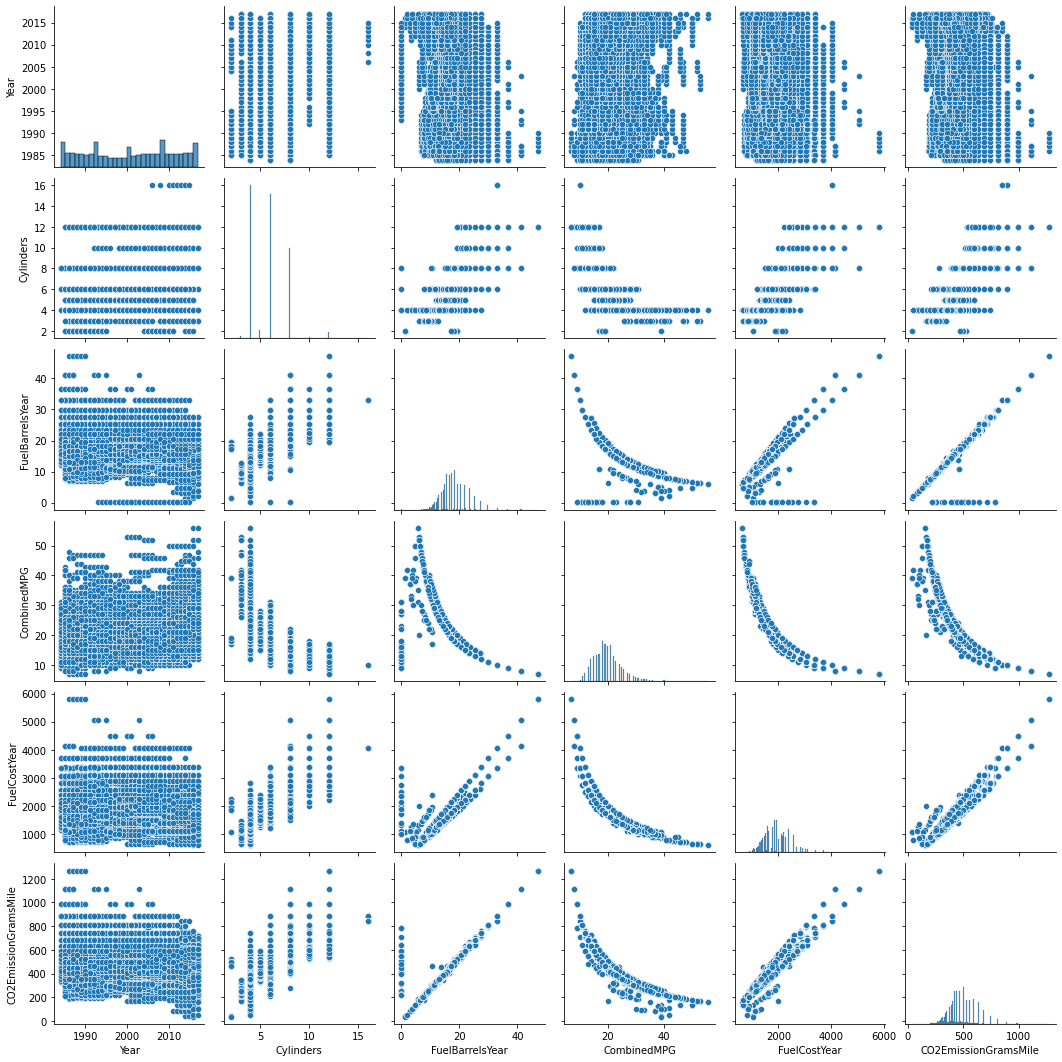

In [90]:
sns.pairplot(cars)

<AxesSubplot:>

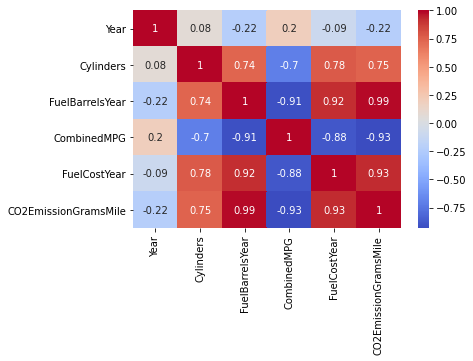

In [121]:

correlation_matrix2 = cars.corr().round(2)
sns.heatmap(data=correlation_matrix2, annot=True,cmap='coolwarm')



>Aparaentemente las variables que mas importan para determinar las emisiones de CO2 son 'Cylinders','FuelBarrelsYear','FuelCostYear'. Mientras que 'Year' no explica gran cosa tenemos a 'CombinedMPG' que explica el CO2 de forma negativa. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [117]:
r1 = smf.ols('CO2EmissionGramsMile ~ Cylinders', data = cars). fit()
r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.566
Model:                              OLS   Adj. R-squared:                  0.566
Method:                   Least Squares   F-statistic:                 4.690e+04
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:00:45   Log-Likelihood:            -2.0784e+05
No. Observations:                 35952   AIC:                         4.157e+05
Df Residuals:                     35950   BIC:                         4.157e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    181.0946      1.420    127.520      0.000     178.311     183.878
Cylinders     51.0352      0.236    216.569      0.000      50.573      51.497
==============================================================================
Omnibus:                     4434.518   Durbin-Watson:                   0.435
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11452.248
Skew:                           0.702   Prob(JB):                         0.00
Kurtosis:                       5.382   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
r2 = smf.ols('CO2EmissionGramsMile ~ FuelBarrelsYear', data = cars). fit()
r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.973
Model:                              OLS   Adj. R-squared:                  0.973
Method:                   Least Squares   F-statistic:                 1.275e+06
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:12:55   Log-Likelihood:            -1.5821e+05
No. Observations:                 35952   AIC:                         3.164e+05
Df Residuals:                     35950   BIC:                         3.164e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          12.4865      0.423     29.523      0.000      11.658      13.316
FuelBarrelsYear    26.2836      0.023   1128.967      0.000      26.238      26.329
==============================================================================
Omnibus:                    88540.411   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        957228555.961
Skew:                          26.696   Prob(JB):                         0.00
Kurtosis:                     800.592   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
r3 = smf.ols('CO2EmissionGramsMile ~ FuelCostYear', data = cars). fit()
r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.867
Model:                              OLS   Adj. R-squared:                  0.867
Method:                   Least Squares   F-statistic:                 2.334e+05
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:13:16   Log-Likelihood:            -1.8665e+05
No. Observations:                 35952   AIC:                         3.733e+05
Df Residuals:                     35950   BIC:                         3.733e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       61.5631      0.887     69.430      0.000      59.825      63.301
FuelCostYear     0.2186      0.000    483.072      0.000       0.218       0.220
==============================================================================
Omnibus:                     1566.464   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.699
Skew:                          -0.399   Prob(JB):                    3.65e-288
Kurtosis:                       2.502   Cond. No.                     7.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
r3 = smf.ols('CO2EmissionGramsMile ~ FuelCostYear', data = cars). fit()
r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.867
Model:                              OLS   Adj. R-squared:                  0.867
Method:                   Least Squares   F-statistic:                 2.334e+05
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:17:33   Log-Likelihood:            -1.8665e+05
No. Observations:                 35952   AIC:                         3.733e+05
Df Residuals:                     35950   BIC:                         3.733e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       61.5631      0.887     69.430      0.000      59.825      63.301
FuelCostYear     0.2186      0.000    483.072      0.000       0.218       0.220
==============================================================================
Omnibus:                     1566.464   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1323.699
Skew:                          -0.399   Prob(JB):                    3.65e-288
Kurtosis:                       2.502   Cond. No.                     7.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [125]:
r4 = smf.ols('CO2EmissionGramsMile ~ CombinedMPG', data = cars). fit()
r4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.858
Model:                              OLS   Adj. R-squared:                  0.858
Method:                   Least Squares   F-statistic:                 2.170e+05
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:20:35   Log-Likelihood:            -1.8778e+05
No. Observations:                 35952   AIC:                         3.756e+05
Df Residuals:                     35950   BIC:                         3.756e+05
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     905.2031      0.953    950.221      0.000     903.336     907.070
CombinedMPG   -21.5706      0.046   -465.877      0.000     -21.661     -21.480
==============================================================================
Omnibus:                    23856.426   Durbin-Watson:                   0.470
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           380865.584
Skew:                           3.004   Prob(JB):                         0.00
Kurtosis:                      17.770   Cond. No.                         83.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 > Inicialmente nos quedarmeos con el que mayor $R^2$ , en este caso $R^2$('FuelBarrelsYear')= 0,973


> Conbinamos  'FuelBarrelsYear' con los otros candidatos con buena correlacion para comprobar que su aportacion al modelo 

In [133]:
r2134 = smf.ols('CO2EmissionGramsMile ~ FuelBarrelsYear +Cylinders + FuelCostYear + CombinedMPG', data = cars). fit()
r2134.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.980
Model:                              OLS   Adj. R-squared:                  0.980
Method:                   Least Squares   F-statistic:                 4.470e+05
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:35:36   Log-Likelihood:            -1.5226e+05
No. Observations:                 35952   AIC:                         3.045e+05
Df Residuals:                     35947   BIC:                         3.046e+05
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         131.1563      1.688     77.714      0.000     127.848     134.464
FuelBarrelsYear    19.6271      0.060    329.809      0.000      19.510      19.744
Cylinders           1.0448      0.080     12.993      0.000       0.887       1.202
FuelCostYear        0.0294      0.000     61.102      0.000       0.028       0.030
CombinedMPG        -3.1666      0.043    -73.810      0.000      -3.251      -3.082
==============================================================================
Omnibus:                    72407.687   Durbin-Watson:                   0.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        274852352.971
Skew:                          16.589   Prob(JB):                         0.00
Kurtosis:                     430.058   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos como todas las variables explicatorias agregadas con alta correlacion mejoran el modelo. Pasando de un $R^2$=0,973 a $R^2$=0,98  Veamos que pasa si al quitarle surgen mejoras explicativas o no.


In [135]:
r213 = smf.ols('CO2EmissionGramsMile ~ FuelBarrelsYear +Cylinders + FuelCostYear ', data = cars). fit()
r213.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.977
Model:                              OLS   Adj. R-squared:                  0.977
Method:                   Least Squares   F-statistic:                 5.160e+05
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:39:27   Log-Likelihood:            -1.5480e+05
No. Observations:                 35952   AIC:                         3.096e+05
Df Residuals:                     35948   BIC:                         3.096e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           9.4862      0.388     24.428      0.000       8.725      10.247
FuelBarrelsYear    22.0626      0.053    415.138      0.000      21.958      22.167
Cylinders           1.0394      0.086     12.045      0.000       0.870       1.208
FuelCostYear        0.0377      0.001     75.098      0.000       0.037       0.039
==============================================================================
Omnibus:                    78457.218   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        446448610.343
Skew:                          19.940   Prob(JB):                         0.00
Kurtosis:                     547.462   Cond. No.                     8.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El $𝑅^2$=0,977 sigue siendo bueno pero no mejora el modelo. Asi que seguimos quedandonos con el anterior, $𝑅^2$=0,98. Veamos que pasa si al quitarle surgen mejoras explicativas o no.

In [136]:
r231 = smf.ols('CO2EmissionGramsMile ~ FuelBarrelsYear + FuelCostYear + CombinedMPG', data = cars). fit()
r231.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     CO2EmissionGramsMile   R-squared:                       0.980
Model:                              OLS   Adj. R-squared:                  0.980
Method:                   Least Squares   F-statistic:                 5.932e+05
Date:                  Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                          03:39:55   Log-Likelihood:            -1.5235e+05
No. Observations:                 35952   AIC:                         3.047e+05
Df Residuals:                     35948   BIC:                         3.047e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         131.6742      1.691     77.861      0.000     128.359     134.989
FuelBarrelsYear    19.6955      0.059    331.484      0.000      19.579      19.812
FuelCostYear        0.0317      0.000     70.466      0.000       0.031       0.033
CombinedMPG        -3.1661      0.043    -73.626      0.000      -3.250      -3.082
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Para obtener el modelo de regresion basta con tomar los correspondientes valores del las coorrelaciones, aplicarlas a las variables explicatorias de la siguiente manera y agregar el interceptor. 

In [152]:
cars['CO2model'] = 19.6955 * cars['FuelBarrelsYear'] + 0.0317 * cars['FuelCostYear'] -3.1661*cars['CombinedMPG']+131.6742

cars[:3]

<ipython-input-152-f1be46ef0d00>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['CO2model'] = 19.6955 * cars['FuelBarrelsYear'] + 0.0317 * cars['FuelCostYear'] -3.1661*cars['CombinedMPG']+131.6742


,Year,Cylinders,FuelBarrelsYear,CombinedMPG,FuelCostYear,CO2EmissionGramsMile,CO2model
Make,,,,,,,
AM General,1984,4.0,19.388824,17,1950,522.764706,521.538074
AM General,1984,6.0,25.354615,13,2550,683.615385,670.721727
AM General,1985,4.0,20.600625,16,2100,555.437500,553.326210


'Cylinders','FuelBarrelsYear','FuelCostYear' 'CombinedMPG'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

<AxesSubplot:xlabel='CO2EmissionGramsMile', ylabel='CO2model'>

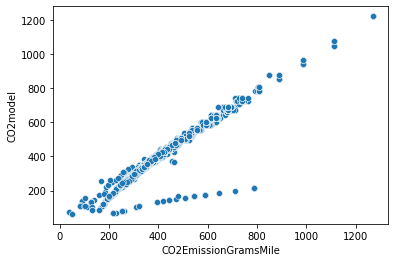

In [164]:
fig, ax = plt.subplots()
sns.scatterplot(x = cars['CO2EmissionGramsMile'],y = cars['CO2model'])

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [24]:
parties = pd.DataFrame({'invited':[1,3,4,6,8,9,11,14],'attended':[1,2,4,4,5,7,8,13]})
parties

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

<AxesSubplot:xlabel='invited', ylabel='attended'>

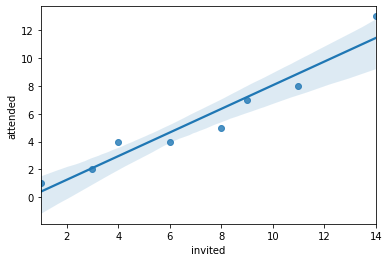

In [27]:
sns.regplot(x = parties.invited,y = parties.attended)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

> Existe una relacion positiva entre las variables. "Cuanta mas gente se invite mas gente vendra"

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

> Se observan atipicos en los puntos (4,4)  (8,5) y (14,13)

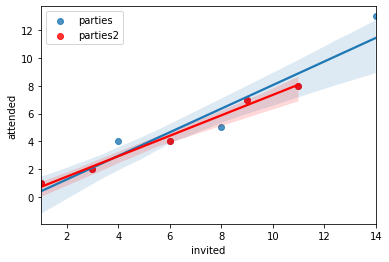

In [37]:
parties2 = pd.DataFrame({'invited':[1,3,6,9,11],'attended':[1,2,4,7,8]})
sns.regplot(x = parties.invited,y = parties.attended,label = 'parties')
sns.regplot(x = parties2.invited,y = parties2.attended,color='r',label = 'parties2')
plt.legend()

Text(0.5, 1.0, 'parties2')

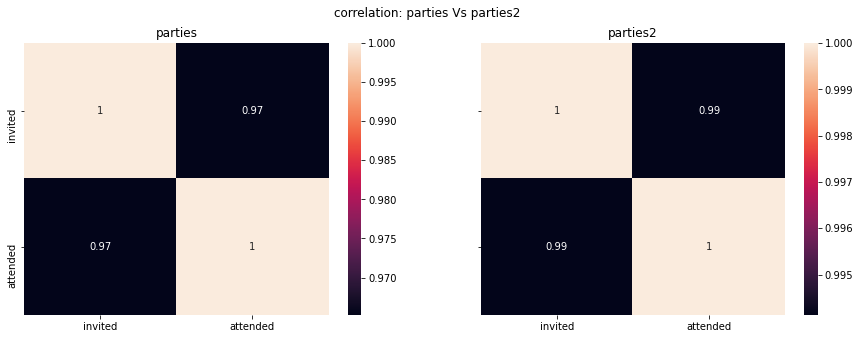

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('correlation: parties Vs parties2 ')
sns.heatmap(ax=axes[0],data=parties.corr(), annot=True)
axes[0].set_title('parties')
sns.heatmap(ax=axes[1],data=parties2.corr(), annot=True)
axes[1].set_title('parties2')

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

> Tras eliminar los atipico observamos una mejora en la correlacion 
